In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from datetime import datetime
import time
import corner
import emcee
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr
from ltsfit.lts_linefit import lts_linefit

In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
df = pd.read_csv("BTFR_i_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

di = df.set_index("PGC")

di.head()

,V3k,Vmod,DM_75,DMi_fid,F21,eF21,lgWmxi,elgWi,Qs,i***,logMs_i
PGC,,,,,,,,,,,
4,4109,4154,33.717026,33.372286,1.905,0.070000,2.189,0.011,5.0,15.12,9.220868
16,5312,5387,34.281429,34.634286,1.190,0.203539,2.515,0.025,5.0,13.58,10.197688
55,4454,4507,33.894131,33.644365,4.300,0.317899,2.260,0.025,5.0,15.22,9.182002
68,7338,7480,34.994202,34.802862,1.610,0.274314,2.390,0.043,5.0,14.52,9.945598
70,6447,6557,34.708220,35.205680,8.330,0.120000,2.636,0.003,5.0,13.24,10.439053


In [4]:
df = pd.read_csv("BTFR_r_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

dr = df.set_index("PGC")

dr.head()

,V3k,Vmod,DM_75,DMr_fid,F21,eF21,lgWmxi,elgWi,Qs,r***,logMs_r
PGC,,,,,,,,,,,
4,4109,4154,33.717026,33.403602,1.905,0.070000,2.189,0.011,5.0,15.33,9.200888
16,5312,5387,34.281429,34.638778,1.190,0.203539,2.515,0.025,5.0,13.86,10.199843
55,4454,4507,33.894131,33.649213,4.300,0.317899,2.260,0.025,5.0,15.32,9.180147
68,7338,7480,34.994202,34.771825,1.610,0.274314,2.390,0.043,5.0,14.61,9.963915
70,6447,6557,34.708220,35.214678,8.330,0.120000,2.636,0.003,5.0,13.46,10.440950


In [5]:
df = pd.read_csv("BTFR_z_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

dz = df.set_index("PGC")

dz.head()

,V3k,Vmod,DM_75,DMz_fid,F21,eF21,lgWmxi,elgWi,Qs,z***,logMs_z
PGC,,,,,,,,,,,
4,4109,4154,33.717026,33.365095,1.905,0.070000,2.189,0.011,5.0,15.07,9.216274
16,5312,5387,34.281429,34.594610,1.190,0.203539,2.515,0.025,5.0,13.40,10.218907
55,4454,4507,33.894131,33.627696,4.300,0.317899,2.260,0.025,5.0,15.17,9.190925
68,7338,7480,34.994202,34.695679,1.610,0.274314,2.390,0.043,5.0,14.34,9.998073
70,6447,6557,34.708220,35.129513,8.330,0.120000,2.636,0.003,5.0,13.02,10.488944


In [6]:
df = pd.read_csv("BTFR_W1_distances.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

d1 = df.set_index("PGC")

d1.head()

,V3k,Vmod,DM_75,DM1_fid,F21,eF21,lgWmxi,elgWi,Qw,w1***,logMs_W1
PGC,,,,,,,,,,,
2,4726,4786,34.024557,34.523247,4.730,0.805837,2.744,0.029,5.0,11.89,10.916793
4,4109,4154,33.717026,33.484223,1.905,0.070000,2.189,0.011,4.0,16.07,9.121780
12,6195,6297,34.620362,35.001671,3.400,0.579492,2.606,0.021,5.0,13.59,10.475115
16,5312,5387,34.281429,34.696151,1.190,0.203539,2.515,0.025,5.0,13.99,10.179541
55,4454,4507,33.894131,33.660157,4.300,0.317899,2.260,0.025,4.0,16.20,9.140623


In [7]:
df = di.join(d1, how='outer', lsuffix='_i', rsuffix='_w1')
commons = ['V3k', 'Vmod', 'lgWmxi', 'elgWi', 'F21', 'eF21', 'DM_75']
for col in commons:
    df[col] = df.apply(lambda X: X[col+"_i"] if ~np.isnan(X[col+"_i"]) else X[col+"_w1"], axis=1)


df = df.join(dr[["r***", "DMr_fid", "logMs_r"]], how='outer')
df = df.join(dz[["z***", "DMz_fid", "logMs_z"]], how='outer')
    
df = df[commons+["DMr_fid", "DMi_fid", "DMz_fid", "DM1_fid", 
                 "r***", 'i***', 'z***', 'w1***', "Qs", "Qw"]]

df.head()

,V3k,Vmod,lgWmxi,elgWi,F21,eF21,DM_75,DMr_fid,DMi_fid,DMz_fid,DM1_fid,r***,i***,z***,w1***,Qs,Qw
PGC,,,,,,,,,,,,,,,,,
2,4726.0,4786.0,2.744,0.029,4.730,0.805837,34.024557,NaN,NaN,NaN,34.523247,NaN,NaN,NaN,11.89,NaN,5.0
4,4109.0,4154.0,2.189,0.011,1.905,0.070000,33.717026,33.403602,33.372286,33.365095,33.484223,15.33,15.12,15.07,16.07,5.0,4.0
12,6195.0,6297.0,2.606,0.021,3.400,0.579492,34.620362,NaN,NaN,NaN,35.001671,NaN,NaN,NaN,13.59,NaN,5.0
16,5312.0,5387.0,2.515,0.025,1.190,0.203539,34.281429,34.638778,34.634286,34.594610,34.696151,13.86,13.58,13.40,13.99,5.0,5.0
55,4454.0,4507.0,2.260,0.025,4.300,0.317899,33.894131,33.649213,33.644365,33.627696,33.660157,15.32,15.22,15.17,16.20,5.0,4.0


In [8]:
old = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')

for col in old.columns:
    newcol = col.strip()
    old.rename(columns={col:newcol}, inplace=True)
old = old.set_index("pgc")

oldCols = ["P0", "ggg", "rrr", "iii", "zzz"]
for col in oldCols:
    old[col] = old[col].apply(lambda x: np.float(x))


df = df.join(old[oldCols], how='left')

df.head()

,V3k,Vmod,lgWmxi,elgWi,F21,eF21,DM_75,DMr_fid,DMi_fid,DMz_fid,...,i***,z***,w1***,Qs,Qw,P0,ggg,rrr,iii,zzz
PGC,,,,,,,,,,,,,,,,,,,,,
2,4726.0,4786.0,2.744,0.029,4.730,0.805837,34.024557,NaN,NaN,NaN,...,NaN,NaN,11.89,NaN,5.0,2.02,0.00,0.00,0.00,0.00
4,4109.0,4154.0,2.189,0.011,1.905,0.070000,33.717026,33.403602,33.372286,33.365095,...,15.12,15.07,16.07,5.0,4.0,-2.75,15.59,15.33,15.12,15.07
12,6195.0,6297.0,2.606,0.021,3.400,0.579492,34.620362,NaN,NaN,NaN,...,NaN,NaN,13.59,NaN,5.0,0.56,0.00,0.00,0.00,0.00
16,5312.0,5387.0,2.515,0.025,1.190,0.203539,34.281429,34.638778,34.634286,34.594610,...,13.58,13.40,13.99,5.0,5.0,0.92,14.36,13.86,13.58,13.40
55,4454.0,4507.0,2.260,0.025,4.300,0.317899,33.894131,33.649213,33.644365,33.627696,...,15.22,15.17,16.20,5.0,4.0,-2.83,15.53,15.32,15.22,15.17


In [9]:
len(df)

10736

In [10]:
cf3 = pd.read_csv("../calibrators/cf3.csv", sep='|')

for col in cf3.columns:
    newcol = col.strip()
    cf3.rename(columns={col:newcol}, inplace=True)

cf3.set_index('PGC', inplace=True)

cf3['DM_cf3'] = cf3['DM']
cf3 = cf3[['DM_cf3']]

cf3.head()

/home/ehsan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DM_cf3
PGC,
4,33.52
27,35.89
40,35.34
51,36.91
55,34.34


In [11]:
df34 = df.join(cf3, how='inner')

df34.head()

,V3k,Vmod,lgWmxi,elgWi,F21,eF21,DM_75,DMr_fid,DMi_fid,DMz_fid,...,z***,w1***,Qs,Qw,P0,ggg,rrr,iii,zzz,DM_cf3
PGC,,,,,,,,,,,,,,,,,,,,,
4,4109.0,4154.0,2.189,0.011,1.905,0.070000,33.717026,33.403602,33.372286,33.365095,...,15.07,16.07,5.0,4.0,-2.75,15.59,15.33,15.12,15.07,33.52
55,4454.0,4507.0,2.260,0.025,4.300,0.317899,33.894131,33.649213,33.644365,33.627696,...,15.17,16.20,5.0,4.0,-2.83,15.53,15.32,15.22,15.17,34.34
70,6447.0,6557.0,2.636,0.003,8.330,0.120000,34.708220,35.214678,35.205680,35.129513,...,13.02,13.54,5.0,5.0,-0.74,13.87,13.46,13.24,13.02,35.35
76,6583.0,6698.0,2.624,0.013,4.425,0.110000,34.754419,34.684317,34.699311,34.690558,...,12.73,13.23,5.0,5.0,0.75,13.80,13.21,12.91,12.73,34.95
94,3995.0,4037.0,2.274,0.032,3.610,0.615244,33.654987,NaN,NaN,NaN,...,NaN,15.84,NaN,4.0,-2.91,0.00,0.00,0.00,0.00,34.15


(<AxesSubplot:label='274311f2-8172-440a-88c9-aec5dbc2ba05'>,
 <AxesSubplot:label='e0c3f2a2-f064-42ec-b253-b3510e10d3a1'>)

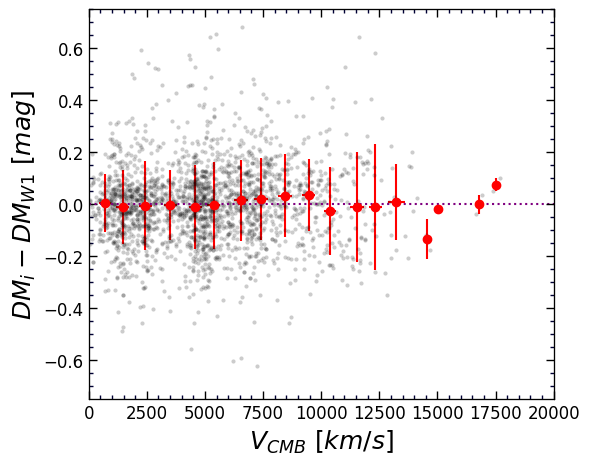

In [12]:
dff = df[(df.Qs>2)&(df.Qw>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DMi_fid.values-dff.DM1_fid.values
# Y = (dff.DM_75.values-dff.DMi_fid.values)/5.


ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{i}-DM_{W1}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.75,0.75), fontsize=12)

# ax.set_title("BTFR: W1-band")


(<AxesSubplot:label='adff8663-dab1-49a4-baf0-147fcd33443b'>,
 <AxesSubplot:label='489170b5-0907-4849-b60a-86411339e3a6'>)

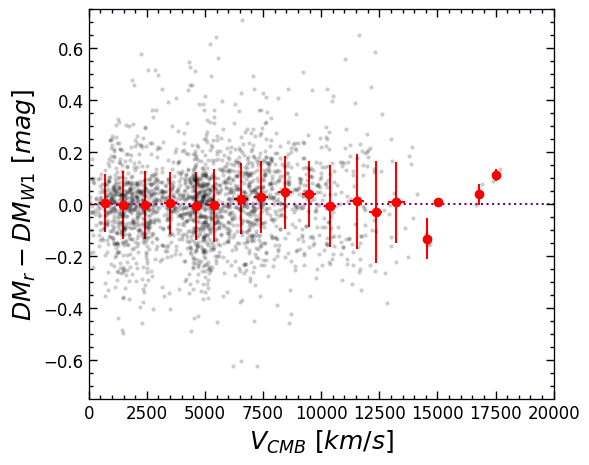

In [13]:
dff = df[(df.Qs>2)&(df.Qw>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DMr_fid.values-dff.DM1_fid.values


ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.40]
Y = Y[np.abs(Y)<0.40]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{r}-DM_{W1}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.75,0.75), fontsize=12)

# ax.set_title("BTFR: W1-band")


(<AxesSubplot:label='6bc3d718-7217-4a6b-89b4-ea5e03faeaf6'>,
 <AxesSubplot:label='d4883f54-e8ac-4955-8b89-e5cab1b1a7b8'>)

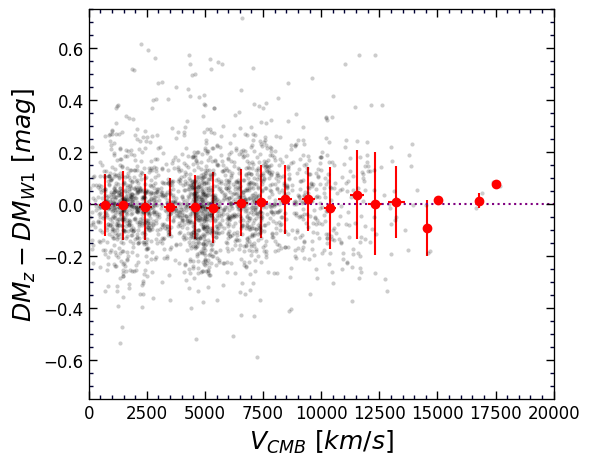

In [14]:
dff = df[(df.Qs>2)&(df.Qw>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DMz_fid.values-dff.DM1_fid.values


ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.40]
Y = Y[np.abs(Y)<0.40]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{z}-DM_{W1}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.75,0.75), fontsize=12)

# ax.set_title("BTFR: W1-band")


(<AxesSubplot:label='d21e8fa3-71a0-4c85-8fb0-195680b80946'>,
 <AxesSubplot:label='f64db61b-1267-43c8-acbc-a8ec8dab077b'>)

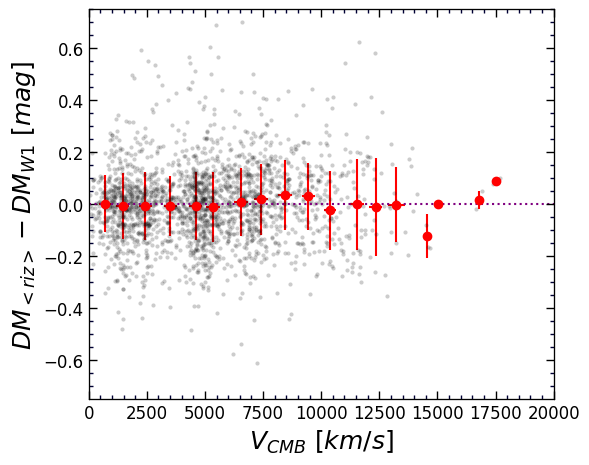

In [15]:
dff = df[(df.Qs>2)&(df.Qw>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = (dff.DMr_fid.values+dff.DMi_fid.values+dff.DMz_fid.values)/3.-dff.DM1_fid.values

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.40]
Y = Y[np.abs(Y)<0.40]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{W1}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.75,0.75), fontsize=12)

# ax.set_title("BTFR: W1-band")


0.006385371472539703


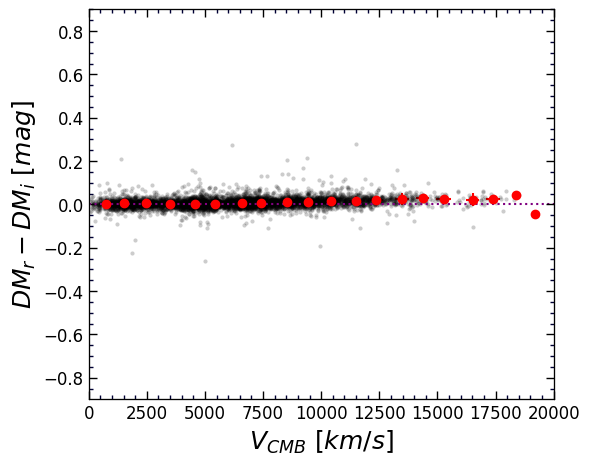

In [16]:
dff = df[(df.Qs>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

sum = 0 
# gz = dff['ggg'].values-dff['zzz'].values

# n = 4
# for i in range(n+1):
#     sum += fit_rgz[i]*gz**(n-i)

X = dff.V3k.values
Y = dff.DMr_fid.values-dff.DMi_fid.values - sum

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.20]
Y = Y[np.abs(Y)<0.20]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{r}-DM_{i}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.9,0.9), fontsize=12)

# ax.set_title("BTFR: W1-band")
print(np.median(Y))

-0.003730669826033761


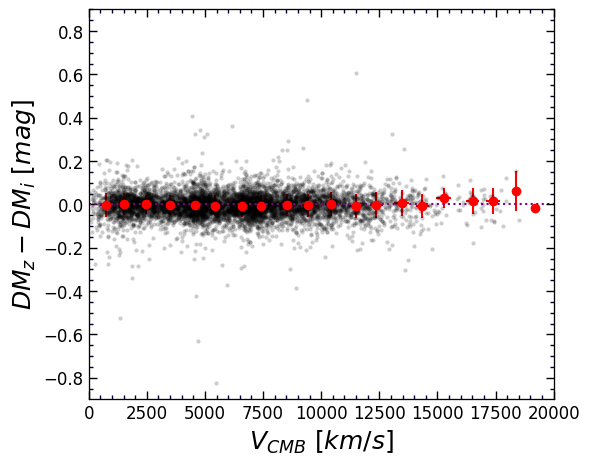

In [17]:
dff = df[(df.Qs>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DMz_fid.values-dff.DMi_fid.values

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.20]
Y = Y[np.abs(Y)<0.20]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{z}-DM_{i}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.9,0.9), fontsize=12)

# ax.set_title("BTFR: W1-band")
print(np.median(Y))

0.0015384918011918103


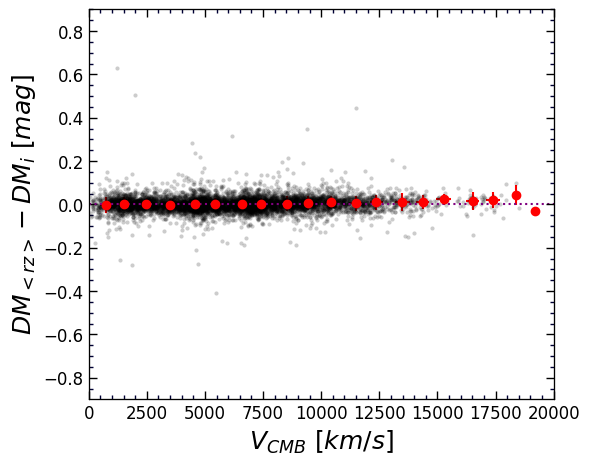

In [18]:
dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


gz = dff['ggg'].values-dff['zzz'].values
X = dff.V3k.values
Y = 0.5*(dff.DMz_fid.values+dff.DMr_fid.values)-dff.DMi_fid.values

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.20]
Y = Y[np.abs(Y)<0.20]


for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$DM_{<rz>}-DM_{i}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-0.9,0.9), fontsize=12)

print(np.median(Y))

sig_int:     0.0000     -0.9522
No intrinsic scatter or errors overestimated
Repeat at best fitting solution
sig_int:     0.0000     -0.9522
################# Values and formal errors ################
 intercept:  0.0114 +/- 0.0021
     slope:  -0.0065 +/- 0.0029
   scatter:  0. +/- 0.0
Observed rms scatter: 0.015
Spearman r=-0.11 and p=1e-20
Pearson r=-0.069 and p=5.7e-09
##########################################################
seconds 5.12


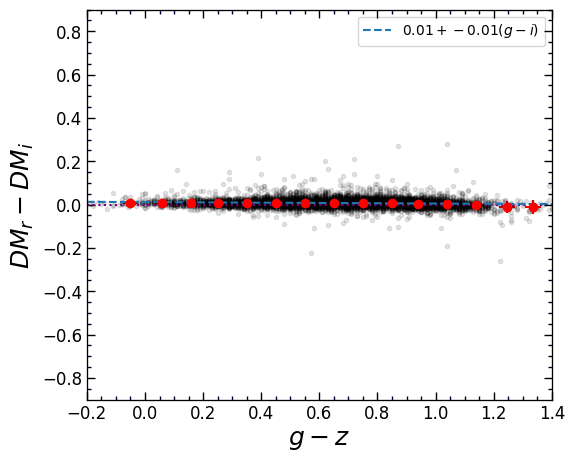

In [19]:
dff = df[(df.Qs>2)&(df.lgWmxi>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff['ggg'].values-dff['zzz'].values
sum = 0 

# n = 4
# for i in range(n+1):
#     sum += fit_rgz[i]*X**(n-i)



Y = dff.DMr_fid.values-dff.DMi_fid.values - sum
ID = dff.index.values


ax.plot(X, Y, 'k.', alpha=0.1)

X = X[np.abs(Y)<0.20]
Y = Y[np.abs(Y)<0.20]

for i in np.arange(-0.1,1.4,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$g-z$', fontsize=18) 
ax.set_ylabel(r'$DM_{r}-DM_{i}$', fontsize=18)

ax.plot([-1.5, 2], [0,0], ':', color='purple')

set_axes(ax, (-.2,1.4), (-0.9,0.9), fontsize=12)



mcfit = lts_linefit(X, Y, X*0+0.07, Y*0+0.07, clip=3., plot=False)
m = mcfit.ab[1]
b = mcfit.ab[0]

color = np.linspace(-0.2,1.4)
zp = '%.2f'%b
slope = '%.2f'%m
ax.plot(color, m*color+b, '--', label=r'$'+zp+'+'+slope+'(g-i)$')

ax.legend()


# n = 4
# fit_rgz, cov_rgz = np.polyfit(X, Y, n, cov=True)
# sum = 0 
# for i in range(n+1):
#     sum += fit_rgz[i]*color**(n-i)
# ax.plot(color, sum, '--')

(<AxesSubplot:label='7dc424bd-8a76-42a0-880d-c54af8495505'>,
 <AxesSubplot:label='a5196080-449c-413f-955e-c37f875898f8'>)

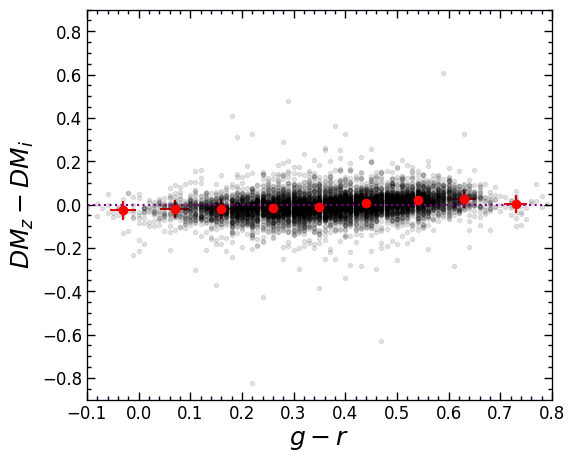

In [20]:
dff = df[(df.Qs>2)&(df.lgWmxi>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff['ggg'].values-dff['rrr'].values
Y = dff.DMz_fid.values-dff.DMi_fid.values
ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)

X = X[np.abs(Y)<0.20]
Y = Y[np.abs(Y)<0.20]

for i in np.arange(-0.1,1.4,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$g-r$', fontsize=18) 
ax.set_ylabel(r'$DM_{z}-DM_{i}$', fontsize=18)

ax.plot([-1.5, 2], [0,0], ':', color='purple')

set_axes(ax, (-.1,0.8), (-0.9,0.9), fontsize=12)



(<AxesSubplot:label='5a816ebb-d100-435a-b992-356cb7894568'>,
 <AxesSubplot:label='c55dbd0f-f028-4a34-bb90-86f09c9e0294'>)

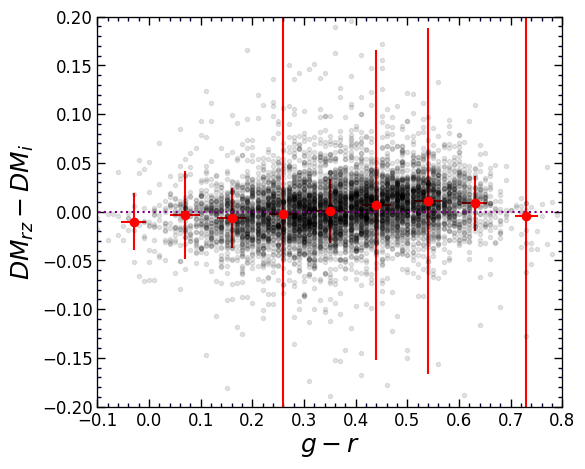

In [21]:
dff = df[(df.Qs>2)&(df.lgWmxi>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff['ggg'].values-dff['rrr'].values
Y = 0.5*(dff.DMz_fid.values+dff.DMr_fid.values)-dff.DMi_fid.values
ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(-0.1,1.4,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$g-r$', fontsize=18) 
ax.set_ylabel(r'$DM_{rz}-DM_{i}$', fontsize=18)

ax.plot([-1.5, 2], [0,0], ':', color='purple')

set_axes(ax, (-.1,0.8), (-0.2,0.2), fontsize=12)



In [22]:
PGC_outlier_1 = [    356,    1286,    1553,    2080,    2266,    2768,    3084,
          3174,    3235,    3717,    3763,    5043,    6054,    6438,
          6966,    6982,    9399,   15460,   21673,   22381,   23355,
         27640,   30358,   32707,   35942,   36349,   36466,   42938,
         43726,   45887,   50012,   51450,   53728,   66948,   67511,
         69016,   83427,   84490,   90431,   90844,   91252,  142838,
        142840,  169737, 4310833, 5057394, 5057398]

PGC_outlier_2 = [   2712,    3081,    3133,    3247,    4387,    6889,    9134,
         36778,   53291,   70708,   71795,   85607,  138562,  142824,
        169989,  170138, 1056132, 1129847, 5076801]


(<AxesSubplot:label='26f9f2ed-31b9-4416-98d3-a7bea3fdd7da'>,
 <AxesSubplot:label='878f1f3f-a3dc-41d8-9f36-af38b46e6b4d'>)

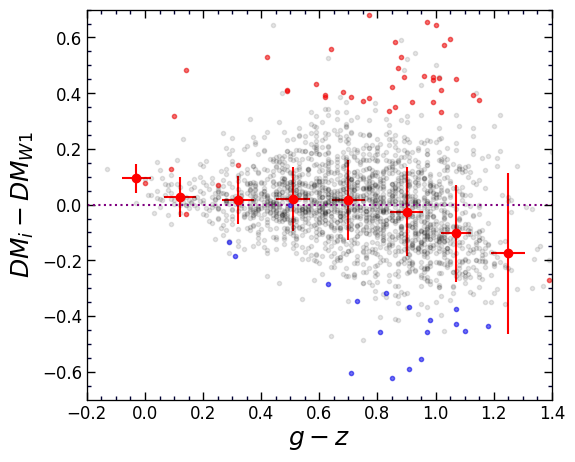

In [23]:
dff = df[(df.Qs>2)&(df.Qw>2)&(df.lgWmxi>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.ggg.values-dff.zzz.values
Y = dff.DMi_fid.values-dff.DM1_fid.values
# Y = (dff.DM_75.values-dff.DMi_fid.values)/5.
ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)

X0 = []
Y0 = []
for i in range(len(X)):
    if ID[i] in PGC_outlier_1:
        ax.plot([X[i]], [Y[i]], 'r.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])
        
        
for i in range(len(X)):
    if ID[i] in PGC_outlier_2:
        ax.plot([X[i]], [Y[i]], 'b.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])        

X = X0
Y = Y0

for i in np.arange(-.2,1.4,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$g-z$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{i}-DM_{W1}$', fontsize=18)

ax.plot([-1.5, 2], [0,0], ':', color='purple')

set_axes(ax, (-.2,1.4), (-0.7,0.7), fontsize=12)



(<AxesSubplot:label='39757d98-686f-4ab2-b0fa-daed172cb8da'>,
 <AxesSubplot:label='c19b4044-2efc-46fa-b68a-92ffab8b3ad6'>)

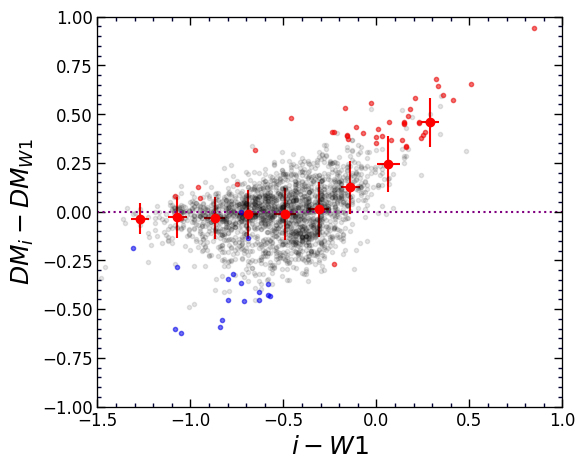

In [24]:
dff = df[(df.Qs>2)&(df.Qw>2)&(df.lgWmxi>2)]
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff["i***"].values-dff["w1***"].values
Y = dff.DMi_fid.values-dff.DM1_fid.values
# Y = (dff.DM_75.values-dff.DMi_fid.values)/5.
ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)

X0 = []
Y0 = []
for i in range(len(X)):
    if ID[i] in PGC_outlier_1:
        ax.plot([X[i]], [Y[i]]
                , 'r.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])
        
        
for i in range(len(X)):
    if ID[i] in PGC_outlier_2:
        ax.plot([X[i]], [Y[i]], 'b.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])        

X = X0
Y = Y0
    
for i in np.arange(-1.4,0.4,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$i-W1$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{i}-DM_{W1}$', fontsize=18)

ax.plot([-1.5, 1.2], [0,0], ':', color='purple')

set_axes(ax, (-1.5,1), (-1,1), fontsize=12)



(<AxesSubplot:label='1d6c9318-0add-45ac-9d58-88d8e26ffbca'>,
 <AxesSubplot:label='a71882ac-9bbd-4b3a-9f59-20e30700d9d3'>)

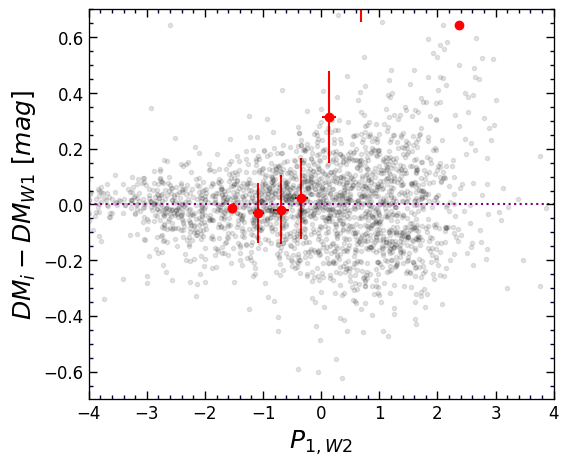

In [25]:
dff = df[(df.Qs>2)&(df.Qw>2)&(df.lgWmxi>0)]###&(df['i***']-df["w1***"]<-0.4)
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.P0.values
Y = dff.DMi_fid.values-dff.DM1_fid.values
# Y = (dff.DM_75.values-dff.DMi_fid.values)/5.


ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)

# X0 = []
# Y0 = []
# for i in range(len(X)):
#     if ID[i] in PGC_outlier_1:
#         ax.plot([X[i]], [Y[i]]
#                 , 'r.', alpha=0.5)
#     else:
#         X0.append(X[i])
#         Y0.append(Y[i])
        
        
# for i in range(len(X)):
#     if ID[i] in PGC_outlier_2:
#         ax.plot([X[i]], [Y[i]], 'b.', alpha=0.5)
#     else:
#         X0.append(X[i])
#         Y0.append(Y[i])        

X = X0
Y = Y0

for i in np.arange(-4,4,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$P_{1,W2}$', fontsize=18)
ax.set_ylabel(r'$DM_{i}-DM_{W1}\/\/[mag]$', fontsize=18)

ax.plot([-4,4], [0,0], ':', color='purple')

set_axes(ax, (-4,4), (-0.7,0.7), fontsize=12)



(<AxesSubplot:label='ec93830f-a5af-4e7e-9271-6dc92a7fbfad'>,
 <AxesSubplot:label='64ad006d-4e32-4c96-83c1-661ccd216b78'>)

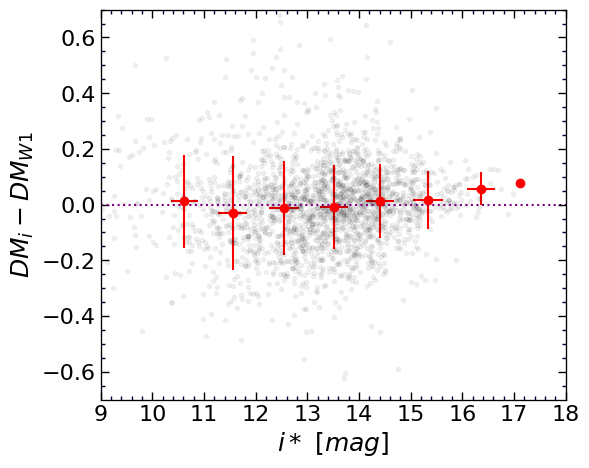

In [26]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff['i***'].values
Y = dff.DMi_fid.values-dff.DM1_fid.values

ax.plot(X, Y, 'k.', alpha=0.05)

for i in np.arange(10,18,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and ~np.isnan(xi) and ~np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.mean(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$i* \/\/[mag]$', fontsize=18) 
ax.set_ylabel(r'$DM_{i}-DM_{W1}$', fontsize=18)

ax.plot([9,18], [0,0], ':', color='purple')

set_axes(ax, (9,18), (-0.7,0.7))

(<AxesSubplot:label='e83ea8b7-6e78-4d46-ad00-9f62315d24b3'>,
 <AxesSubplot:label='99b51d44-1c73-410d-bef4-8ce2887c710d'>)

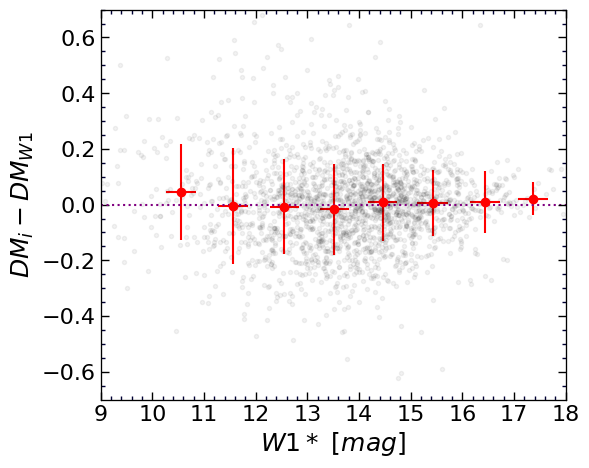

In [27]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff['w1***'].values
Y = dff.DMi_fid.values-dff.DM1_fid.values

ax.plot(X, Y, 'k.', alpha=0.05)

for i in np.arange(10,18,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 and ~np.isnan(xi) and ~np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.mean(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$W1* \/\/[mag]$', fontsize=18) 
ax.set_ylabel(r'$DM_{i}-DM_{W1}$', fontsize=18)

ax.plot([9,18], [0,0], ':', color='purple')

set_axes(ax, (9,18), (-0.7,0.7))

(<AxesSubplot:label='1dcca768-194d-4d08-8735-8c84e1d12760'>,
 <AxesSubplot:label='890bbe6f-1926-4f37-bc54-93a121e3f9b8'>)

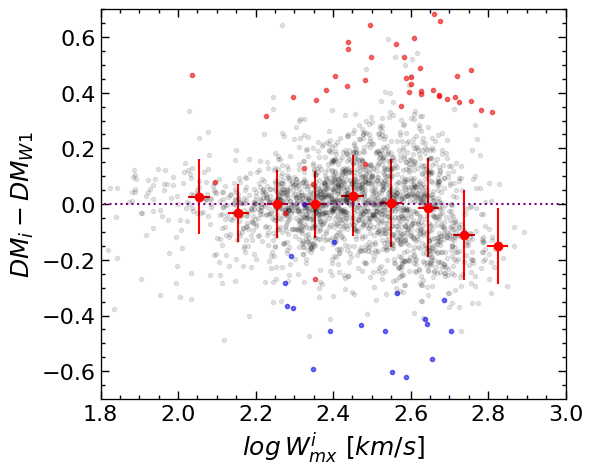

In [28]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.lgWmxi.values
Y = dff.DMi_fid.values-dff.DM1_fid.values
ID = dff.index.values

ax.plot(X, Y, 'k.', alpha=0.1)

X0 = []
Y0 = []
for i in range(len(X)):
    if ID[i] in PGC_outlier_1:
        ax.plot([X[i]], [Y[i]]
                , 'r.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])
        
        
for i in range(len(X)):
    if ID[i] in PGC_outlier_2:
        ax.plot([X[i]], [Y[i]], 'b.', alpha=0.5)
    else:
        X0.append(X[i])
        Y0.append(Y[i])        

X = X0
Y = Y0



for i in np.arange(2,3,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1 and ~np.isnan(xi) and ~np.isnan(Y[ii]):
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.mean(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18)
ax.set_ylabel(r'$DM_{i} - DM_{W1}$', fontsize=18)

ax.plot([-10,10], [0,0], ':', color='purple')

set_axes(ax, (1.8,3), (-0.7,0.7))

# ax.set_title("BTFR: W1-band")

In [29]:
dff["delta"] = dff.DMi_fid.values-dff.DM1_fid.values

dff[(dff.Vmod<2500)&(dff.delta<0.1)]

<ipython-input-29-ffef637fabca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["delta"] = dff.DMi_fid.values-dff.DM1_fid.values


,V3k,Vmod,lgWmxi,elgWi,F21,eF21,DM_75,DMr_fid,DMi_fid,DMz_fid,...,z***,w1***,Qs,Qw,P0,ggg,rrr,iii,zzz,delta
PGC,,,,,,,,,,,,,,,,,,,,,
279,1959.0,1970.0,2.612,0.005,14.455,0.13,32.097025,32.323858,32.336264,32.380657,...,10.53,10.76,5.0,5.0,1.63000,11.59,10.98,10.66,10.53,0.061042
889,501.0,502.0,1.963,0.009,13.950,0.06,29.128212,29.649966,29.626693,29.637525,...,14.16,15.25,4.0,4.0,-4.99000,13.77,13.94,13.85,14.16,0.048974
924,1340.0,1345.0,2.187,0.011,3.665,0.08,31.268305,31.776672,31.775829,31.718868,...,13.32,14.37,5.0,5.0,-1.88000,14.09,13.69,13.47,13.32,-0.227247
1525,494.0,495.0,2.301,0.004,44.485,0.10,29.097720,30.730876,30.712446,30.730571,...,11.84,12.86,5.0,4.0,-2.38104,12.32,12.04,11.85,11.84,-0.115209
1750,990.0,993.0,2.035,0.025,6.870,0.06,30.609440,30.692114,30.699029,30.711760,...,14.11,14.95,5.0,5.0,-2.47000,14.55,14.23,14.08,14.11,-0.014522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365234,2136.0,2149.0,2.070,0.008,2.420,0.07,32.285876,32.633416,32.625421,32.650273,...,16.53,17.35,5.0,3.0,-3.87000,16.58,16.43,16.30,16.53,0.020991
1419134,2388.0,2403.0,1.824,0.134,0.620,0.05,32.528463,31.692091,31.660798,31.588937,...,16.23,17.38,5.0,3.0,-3.84000,16.46,16.41,16.29,16.23,0.056791
4017882,1979.0,1989.0,1.843,0.120,0.855,0.08,32.117868,31.738537,31.712238,31.715051,...,16.86,17.75,4.0,3.0,-4.70000,17.01,16.93,16.74,16.86,0.056685


<ipython-input-30-608f85748a42>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = df34[(df.Qs>2)]


(<AxesSubplot:label='c5074f79-03ac-4833-84d0-6c14c4800bb6'>,
 <AxesSubplot:label='a7396cec-5cfa-4226-9d2e-6fac5cda1ab8'>)

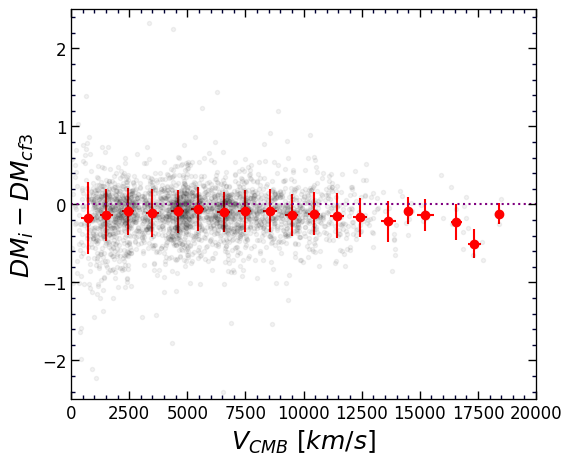

In [30]:
dff = df34[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DMi_fid.values-dff.DM_cf3.values

ax.plot(X, Y, 'k.', alpha=0.05)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{i}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")


<ipython-input-36-62d806000463>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = df34[(df.Qs>2)]


(<AxesSubplot:label='e6259317-eee6-4fc3-a7a9-05108e4f1c89'>,
 <AxesSubplot:label='5ba81b4d-f750-4483-a495-09cedddc57bf'>)

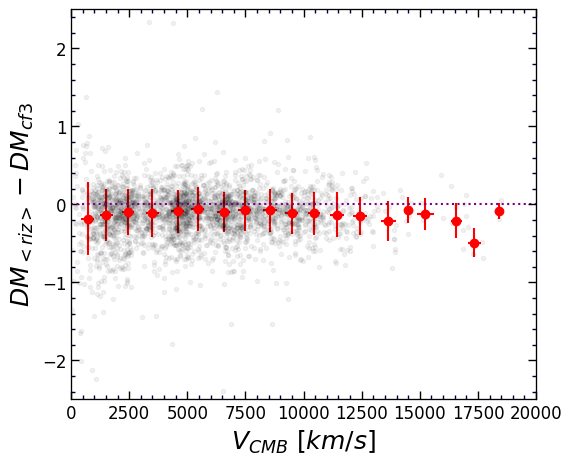

In [36]:
dff = df34[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = (dff.DMr_fid.values+dff.DMi_fid.values+dff.DMz_fid.values)/3.-dff.DM_cf3.values

ax.plot(X, Y, 'k.', alpha=0.05)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")


<ipython-input-31-1ae10efb2f4c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = df34[(df.Qw>2)]


(<AxesSubplot:label='9f20b6bd-2e5b-4ed8-811d-89a2063dca3b'>,
 <AxesSubplot:label='576c1df6-fa32-44fb-8c12-e52d9ebeff5a'>)

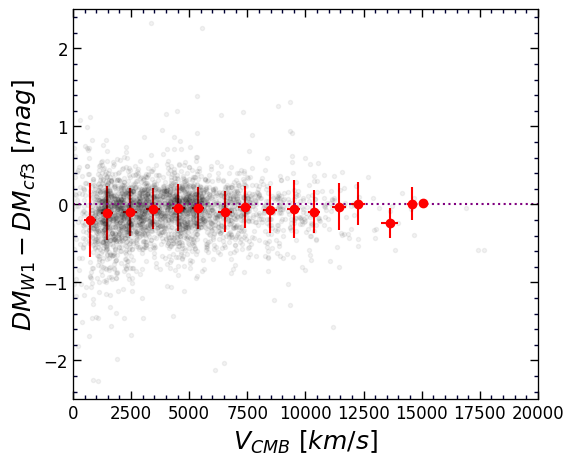

In [31]:
dff = df34[(df.Qw>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.V3k.values
Y = dff.DM1_fid.values-dff.DM_cf3.values

ax.plot(X, Y, 'k.', alpha=0.05)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,16000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
#         print(np.mean(xp), np.median(yp))

        
ax.set_xlabel(r'$V_{CMB} \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$DM_{W1}-DM_{cf3}\/\/[mag]$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='purple')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")


In [32]:
from astropy.table import Table, Column

df_ = df.reset_index()

df_.to_csv('BTFR_CF4_Dist_bar.csv', sep='|', index=False)


table   = np.genfromtxt('BTFR_CF4_Dist_bar.csv' , delimiter='|', 
                        filling_values=-100000, names=True, dtype=None, encoding=None)

colnames = table.dtype.names

## table is a structured array
myTable = {}
for name in table.dtype.names:
    myTable[name] = table[name]
table = myTable
## table is now a dictionary

myTable = Table()

for key in colnames:
    if key in ["PGC"]:
        myTable.add_column(Column(data=table[key], name=key))
    elif key in ["F21", "eF21", "lgWmxi", "elgWi"]:
        myTable.add_column(Column(data=table[key], name=key, format='%0.3f'))    
    elif key in ["Vls", 'V3k', 'Vmod', "Qs", "Qw"]:
        myTable.add_column(Column(data=table[key], name=key, dtype=np.dtype(int)))
    elif key in ["P0", "ggg", "rrr", "iii", "zzz"]:
        pass
    else:
        myTable.add_column(Column(data=table[key], name=key, format='%0.2f'))

## to be used on EDD
myTable.write('BTFR_CF4_Dist_bar', format='ascii.fixed_width',delimiter='|', bookend=False, overwrite=True)
## cf4btfdistances

In [33]:
df_.head()

,PGC,V3k,Vmod,lgWmxi,elgWi,F21,eF21,DM_75,DMr_fid,DMi_fid,...,i***,z***,w1***,Qs,Qw,P0,ggg,rrr,iii,zzz
0,2,4726.0,4786.0,2.744,0.029,4.730,0.805837,34.024557,NaN,NaN,...,NaN,NaN,11.89,NaN,5.0,2.02,0.00,0.00,0.00,0.00
1,4,4109.0,4154.0,2.189,0.011,1.905,0.070000,33.717026,33.403602,33.372286,...,15.12,15.07,16.07,5.0,4.0,-2.75,15.59,15.33,15.12,15.07
2,12,6195.0,6297.0,2.606,0.021,3.400,0.579492,34.620362,NaN,NaN,...,NaN,NaN,13.59,NaN,5.0,0.56,0.00,0.00,0.00,0.00
3,16,5312.0,5387.0,2.515,0.025,1.190,0.203539,34.281429,34.638778,34.634286,...,13.58,13.40,13.99,5.0,5.0,0.92,14.36,13.86,13.58,13.40
4,55,4454.0,4507.0,2.260,0.025,4.300,0.317899,33.894131,33.649213,33.644365,...,15.22,15.17,16.20,5.0,4.0,-2.83,15.53,15.32,15.22,15.17


(<AxesSubplot:label='b89376e8-60a8-45a1-879a-2b869a74f468'>,
 <AxesSubplot:label='6daf5610-5d5e-441a-9696-a04ec472c931'>)

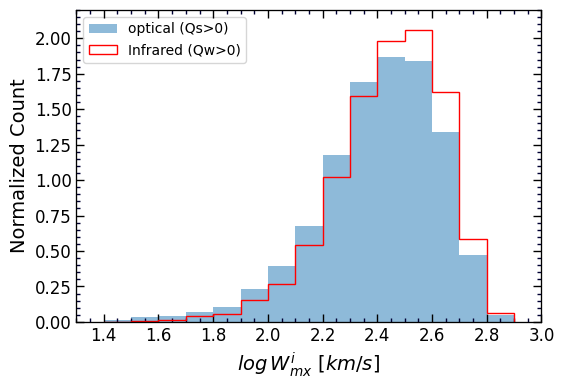

In [34]:
fig = py.figure(figsize=(5,4), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

bins = np.arange(1.4,3,0.1)

ax.hist(df_[df_.Qs>0].lgWmxi, bins=bins, alpha=0.5, density=True, label='optical (Qs>0)')
ax.hist(df_[df_.Qw>0].lgWmxi, bins=bins, alpha=1, density=True, histtype='step', color='red', label='Infrared (Qw>0)')

ax.legend(loc=2)

ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=14)
ax.set_ylabel('Normalized Count', fontsize=14)

set_axes(ax, (1.3,3), (0,2.2), fontsize=12)
